In [1]:
!pip install opencv-python numpy

In [ ]:
!pip install pytesseract

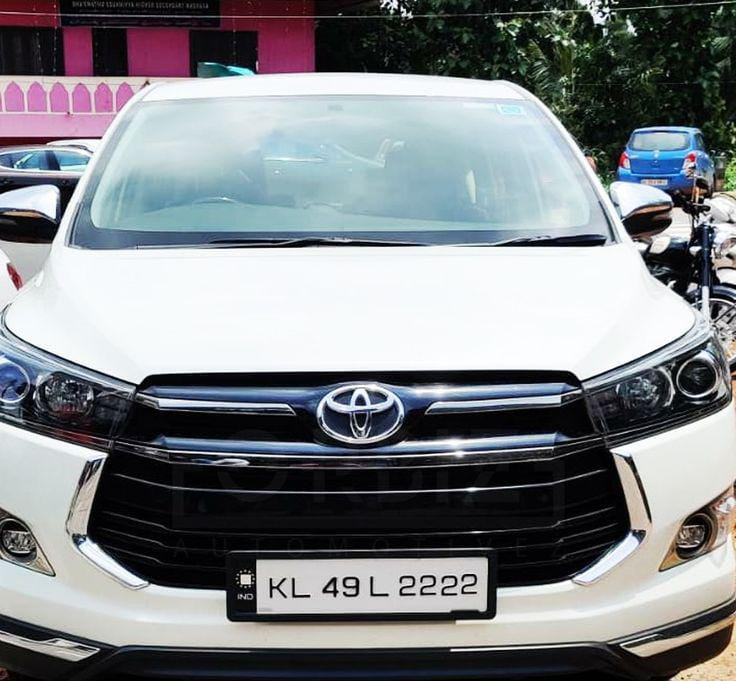

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image, include error handling
image = cv2.imread("/content/number.jpg")  # Replace with your image path

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path and format.")
else:
    # Image loaded successfully, proceed with displaying it
    cv2_imshow(image)

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image, include error handling
image = cv2.imread("/content/number.jpg")  # Replace with your image path

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path and format.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # ... rest of your code ...

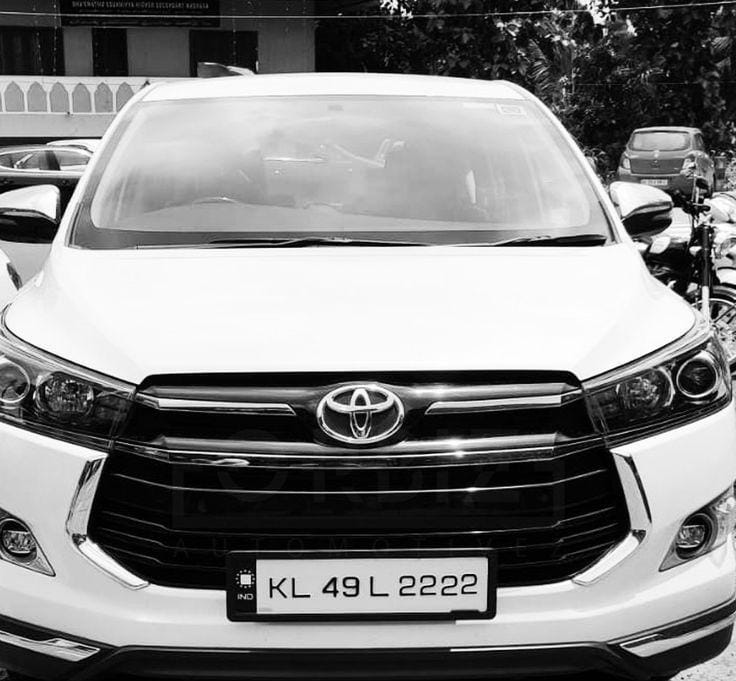

In [5]:
if image is None:
    print("Error: Could not load image. Please check the file path and format.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image using cv2_imshow
    cv2_imshow(gray) # Use cv2_imshow instead of cv2.imshow
    # Remove cv2.waitKey(0) and cv2.destroyAllWindows() as they are not needed in Colab
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

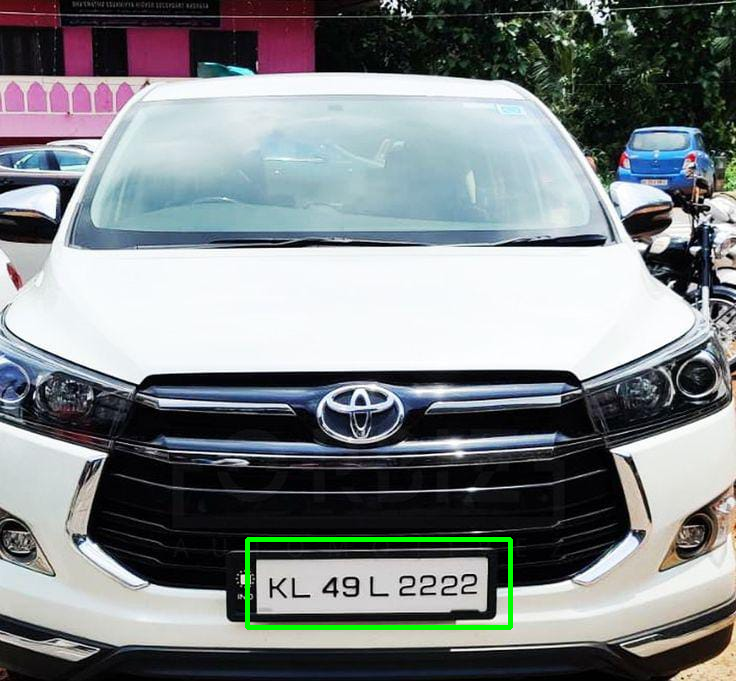

In [6]:
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in plates:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Use cv2_imshow instead of cv2.imshow for displaying in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(image)  # Display the image with the detected number plate
# cv2.imshow("Detected Plate", image)
# cv2.waitKey(0)  # Remove as not needed in Colab
# cv2.destroyAllWindows() # Remove as not needed in Colab


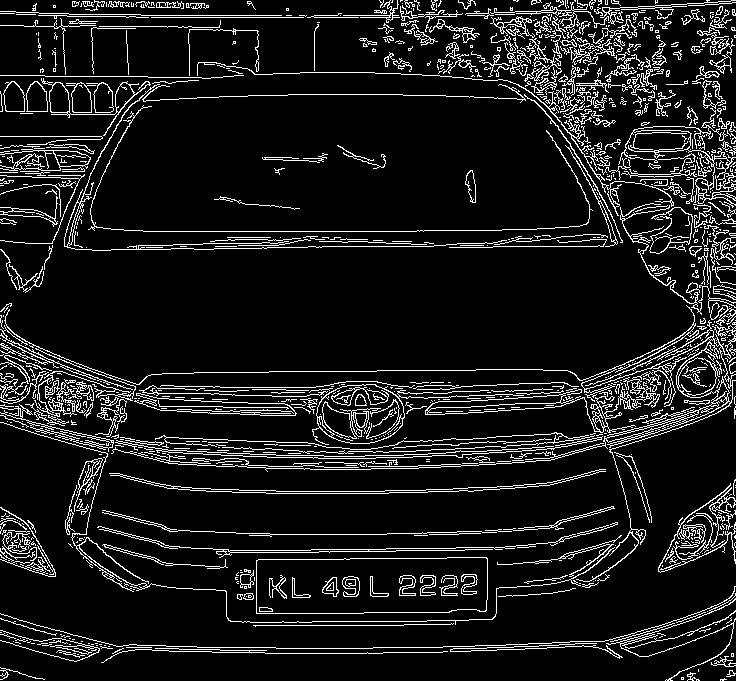

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

edges = cv2.Canny(gray, 50, 200)

# Display the edges using cv2_imshow
cv2_imshow(edges) # Use cv2_imshow instead of cv2.imshow

# cv2.waitKey(0) and cv2.destroyAllWindows() are not needed in Colab
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [9]:
!pip install pytesseract

Detected Number Plate Text: KL 49L 2222)



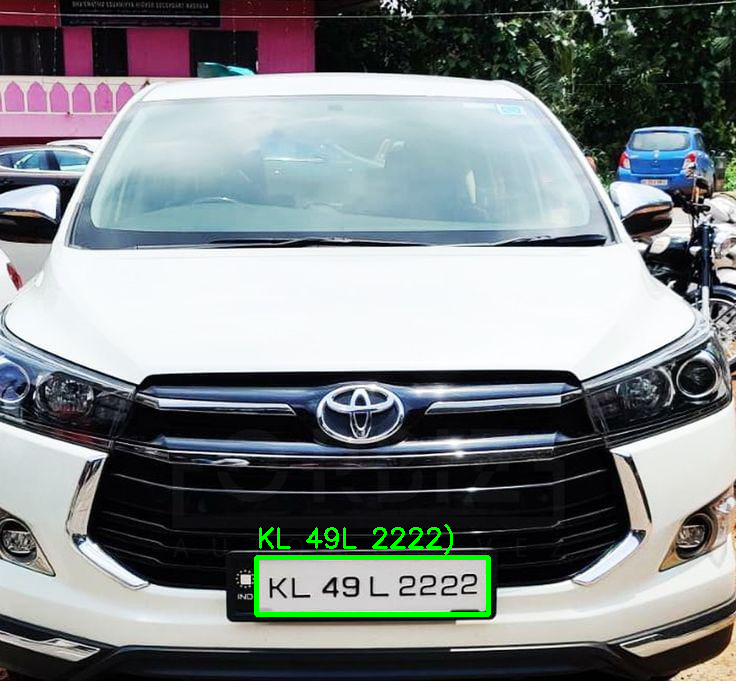

In [10]:
import cv2
import numpy as np
import pytesseract

# Load the image
image = cv2.imread('/content/number.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to reduce noise while keeping edges sharp
filtered = cv2.bilateralFilter(gray, 9, 75, 75)

# Apply edge detection
edges = cv2.Canny(filtered, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Detect and highlight number plate
number_plate = None
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:  # Assuming number plate has 4 corners
        x, y, w, h = cv2.boundingRect(cnt)
        number_plate = image[y:y+h, x:x+w]
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
        break

# Apply OCR to extract characters from number plate
if number_plate is not None:
    # Set the path to the Tesseract executable for Google Colab
    pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
    text = pytesseract.image_to_string(number_plate, config='--psm 8')
    print("Detected Number Plate Text:", text)

    # Display extracted text on the image
    cv2.putText(image, text.strip(), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image using a method suitable for Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(image)